In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('malaria_clin_data.csv')
df

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,Blood_culture,Urine_culture,Taq_man_PCR,parasite_density,Microscopy,Laboratory_Results,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,126080.0,Positive,P. falciparum,Severe Malaria,5.7,2.80,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,149400.0,Positive,P. falciparum,Severe Malaria,7.8,3.50,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,5880.0,Positive,P. falciparum,Severe Malaria,8.2,1.00,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,85000.0,Positive,P. falciparum,Severe Malaria,15.9,3.30,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,149760.0,Positive,P. falciparum,Severe Malaria,4.5,2.10,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,KC366,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,NaN,NaN,NaN,149385.0,Positive,P. falciparum,Uncomplicated Malaria,12.3,4.33,10.2,32.0,74.0,23.7,32.0,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,KC368,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,NaN,NaN,NaN,0.0,Negative,Undetermined,Non-malaria Infection,8.1,3.74,9.5,29.1,7.8,25.3,32.5,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,KC369,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,NaN,NaN,NaN,0.0,Negative,Undetermined,Non-malaria Infection,9.5,4.38,11.9,36.6,84.0,27.2,32.6,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,KC370,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,NaN,NaN,NaN,0.0,Negative,Undetermined,Non-malaria Infection,12.3,4.78,12.1,38.2,80.0,25.4,31.7,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [4]:
df.dtypes

SampleID                   object
consent_given              object
location                   object
Enrollment_Year             int64
bednet                     object
fever_symptom              object
temperature               float64
Suspected_Organism         object
Suspected_infection        object
RDT                        object
Blood_culture              object
Urine_culture              object
Taq_man_PCR                object
parasite_density          float64
Microscopy                 object
Laboratory_Results         object
Clinical_Diagnosis         object
wbc_count                 float64
rbc_count                 float64
hb_level                  float64
hematocrit                float64
mean_cell_volume          float64
mean_corp_hb              float64
mean_cell_hb_conc         float64
platelet_count            float64
platelet_distr_width      float64
mean_platelet_vl          float64
neutrophils_percent       float64
lymphocytes_percent       float64
mixed_cells_pe

In [5]:
df.head()

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,Blood_culture,Urine_culture,Taq_man_PCR,parasite_density,Microscopy,Laboratory_Results,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,126080.0,Positive,P. falciparum,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,149400.0,Positive,P. falciparum,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,5880.0,Positive,P. falciparum,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,85000.0,Positive,P. falciparum,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,NaN,NaN,NaN,149760.0,Positive,P. falciparum,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


<Axes: >

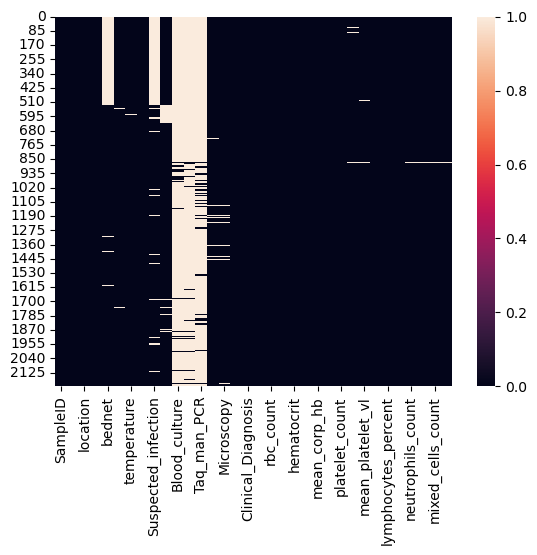

In [6]:
sb.heatmap(df.isnull())

In [7]:
df.isnull().sum()/df.shape[0]*100

SampleID                   0.000000
consent_given              0.000000
location                   0.000000
Enrollment_Year            0.000000
bednet                    24.059810
fever_symptom              0.317173
temperature                0.453104
Suspected_Organism         0.000000
Suspected_infection       28.908020
RDT                        6.434073
Blood_culture             94.472134
Urine_culture             94.925238
Taq_man_PCR               92.025374
parasite_density           1.540553
Microscopy                 1.676484
Laboratory_Results         0.000000
Clinical_Diagnosis         0.000000
wbc_count                  0.000000
rbc_count                  0.000000
hb_level                   0.000000
hematocrit                 0.000000
mean_cell_volume           0.000000
mean_corp_hb               0.135931
mean_cell_hb_conc          0.090621
platelet_count             0.407793
platelet_distr_width       1.449932
mean_platelet_vl           0.770276
neutrophils_percent        0

In [8]:
df.drop(['SampleID','bednet','consent_given','location','Enrollment_Year','Blood_culture','Urine_culture','Taq_man_PCR'],axis=1,inplace=True)

In [9]:
df

,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,parasite_density,Microscopy,Laboratory_Results,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Yes,38.0,Not Known / Missing entry,NaN,Positive,126080.0,Positive,P. falciparum,Severe Malaria,5.7,2.80,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Yes,38.2,Not Known / Missing entry,NaN,Positive,149400.0,Positive,P. falciparum,Severe Malaria,7.8,3.50,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Yes,37.7,Not Known / Missing entry,NaN,Positive,5880.0,Positive,P. falciparum,Severe Malaria,8.2,1.00,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Yes,37.7,Not Known / Missing entry,NaN,Positive,85000.0,Positive,P. falciparum,Severe Malaria,15.9,3.30,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Yes,37.1,Not Known / Missing entry,NaN,Positive,149760.0,Positive,P. falciparum,Severe Malaria,4.5,2.10,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,149385.0,Positive,P. falciparum,Uncomplicated Malaria,12.3,4.33,10.2,32.0,74.0,23.7,32.0,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,0.0,Negative,Undetermined,Non-malaria Infection,8.1,3.74,9.5,29.1,7.8,25.3,32.5,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,No,36.4,Bacteria,Dermatitis,Negative,0.0,Negative,Undetermined,Non-malaria Infection,9.5,4.38,11.9,36.6,84.0,27.2,32.6,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,No,37.4,Not Known / Missing entry,URTI,Negative,0.0,Negative,Undetermined,Non-malaria Infection,12.3,4.78,12.1,38.2,80.0,25.4,31.7,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [10]:
a=df.mean()
a

temperature                  37.869822
parasite_density          61751.964657
wbc_count                    10.734209
rbc_count                     3.890689
hb_level                      9.360222
hematocrit                   29.101541
mean_cell_volume             74.635850
mean_corp_hb                 24.102704
mean_cell_hb_conc            32.304259
platelet_count              213.672611
platelet_distr_width         14.124184
mean_platelet_vl              8.026119
neutrophils_percent          58.486951
lymphocytes_percent          33.119574
mixed_cells_percent           8.393521
neutrophils_count             6.435157
lymphocytes_count             3.450660
mixed_cells_count             0.856179
RBC_dist_width_Percent       16.381797
dtype: float64

In [11]:
df.fillna(a,inplace=True)

<Axes: >

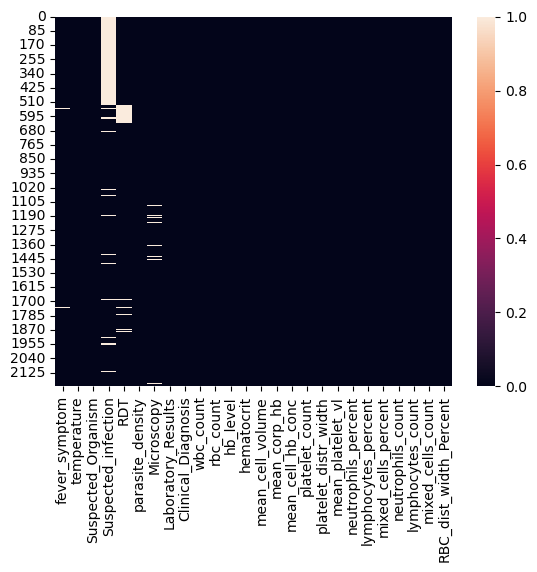

In [12]:
sb.heatmap(df.isnull())

In [13]:
df.isnull().sum()/df.shape[0]*100

fever_symptom              0.317173
temperature                0.000000
Suspected_Organism         0.000000
Suspected_infection       28.908020
RDT                        6.434073
parasite_density           0.000000
Microscopy                 1.676484
Laboratory_Results         0.000000
Clinical_Diagnosis         0.000000
wbc_count                  0.000000
rbc_count                  0.000000
hb_level                   0.000000
hematocrit                 0.000000
mean_cell_volume           0.000000
mean_corp_hb               0.000000
mean_cell_hb_conc          0.000000
platelet_count             0.000000
platelet_distr_width       0.000000
mean_platelet_vl           0.000000
neutrophils_percent        0.000000
lymphocytes_percent        0.000000
mixed_cells_percent        0.000000
neutrophils_count          0.000000
lymphocytes_count          0.000000
mixed_cells_count          0.000000
RBC_dist_width_Percent     0.000000
dtype: float64

In [14]:
# df['bednet'].value_counts()

In [15]:
# df['bednet'].replace('Yes','yes',inplace=True)

In [16]:
# df['bednet'].replace('No','no',inplace=True)

In [17]:
# df['bednet'].value_counts()

In [18]:
# df['bednet'].fillna('yes',inplace=True)

In [19]:
df['fever_symptom'].value_counts()

Yes    1704
No      496
Name: fever_symptom, dtype: int64

In [20]:
df['fever_symptom'].fillna('yes',inplace=True)

In [21]:
df['Suspected_infection'].value_counts()

Malaria                   440
URTI                      176
Gastroenteritis            80
Fever                      72
Sepsis                     69
                         ... 
Conjunctivitis              1
Sinusitis                   1
Epistatis                   1
Scabies                     1
Instetinal flagellates      1
Name: Suspected_infection, Length: 276, dtype: int64

In [22]:
df['Suspected_infection'].unique()

array([nan, 'respiractory tract infection', 'hernia', 'teething',
       'Injury', 'Malaria', 'Fever', 'gastroenteritis', 'Chicken pox',
       'diarrhoea', 'Cough', 'Neonatal jaundice', 'Jaundice',
       'Common cold', 'Tooth decay', 'Eye problem', 'Headache/Fever',
       'Boil', 'Febrile convulsion', 'URTI', 'enteric fever',
       'Gastroentritis', 'Sepsis', 'Pneumonia',
       'Enteritis ,helminthiasis', 'severe malaria', 'Helminthiasis',
       'Gastroenteritis', 'Dog bite', 'fever abd abdominal pain',
       'septic wound', 'Malaria/anaemia', 'fever,diarrhoea', 'fever',
       'Malaria/Febrile illness', 'malaria/headache', 'sore throat',
       'intestinal problem', 'myalgia', 'fever,bloody stool', 'Rashes',
       'SKIN RASHES', 'CATARRH', 'STOMACH PAINS', 'CATARRH/DYSENTRY',
       'DIARRHOEA', 'Not diagnosed', 'Tonsilitis',
       'Otitis Media/Tonsilitis/malaria',
       'Cervical Lymphaedenopathy/oral ulcer/Gastroenteritis',
       'Otitis media', 'Bilateral otitis media/c

In [23]:
df['Suspected_infection'].fillna('unknown',inplace=True)

In [24]:
df['RDT'].value_counts()

Positive    1096
Negative     969
Name: RDT, dtype: int64

In [25]:
df['RDT'].fillna("Positive",inplace=True)

In [26]:
df['Microscopy'].value_counts()

Positive    1152
Negative    1018
Name: Microscopy, dtype: int64

In [27]:
df['Microscopy'].fillna("Positive",inplace=True)

In [28]:
df.isnull().sum()/df.shape[0]*100

fever_symptom             0.0
temperature               0.0
Suspected_Organism        0.0
Suspected_infection       0.0
RDT                       0.0
parasite_density          0.0
Microscopy                0.0
Laboratory_Results        0.0
Clinical_Diagnosis        0.0
wbc_count                 0.0
rbc_count                 0.0
hb_level                  0.0
hematocrit                0.0
mean_cell_volume          0.0
mean_corp_hb              0.0
mean_cell_hb_conc         0.0
platelet_count            0.0
platelet_distr_width      0.0
mean_platelet_vl          0.0
neutrophils_percent       0.0
lymphocytes_percent       0.0
mixed_cells_percent       0.0
neutrophils_count         0.0
lymphocytes_count         0.0
mixed_cells_count         0.0
RBC_dist_width_Percent    0.0
dtype: float64

<Axes: >

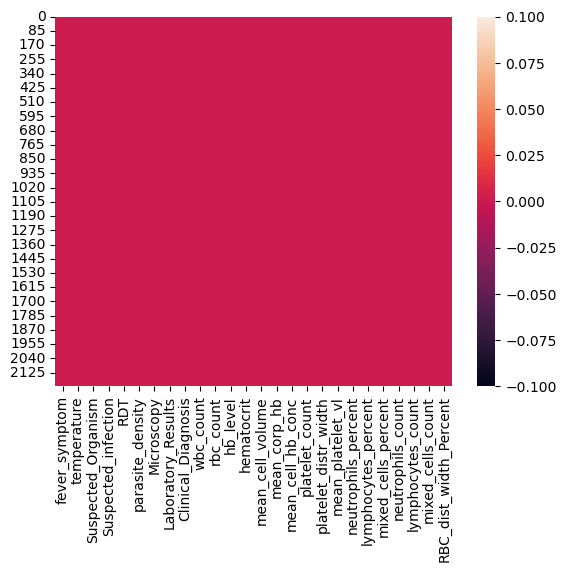

In [29]:
sb.heatmap(df.isnull())

In [30]:
df['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    978
Uncomplicated Malaria    703
Severe Malaria           526
Name: Clinical_Diagnosis, dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df_obj=df.select_dtypes(object)
df_obj

,fever_symptom,Suspected_Organism,Suspected_infection,RDT,Microscopy,Laboratory_Results,Clinical_Diagnosis
0,Yes,Not Known / Missing entry,unknown,Positive,Positive,P. falciparum,Severe Malaria
1,Yes,Not Known / Missing entry,unknown,Positive,Positive,P. falciparum,Severe Malaria
2,Yes,Not Known / Missing entry,unknown,Positive,Positive,P. falciparum,Severe Malaria
3,Yes,Not Known / Missing entry,unknown,Positive,Positive,P. falciparum,Severe Malaria
4,Yes,Not Known / Missing entry,unknown,Positive,Positive,P. falciparum,Severe Malaria
...,...,...,...,...,...,...,...
2202,No,Bacteria/Protozoa,Malaria/LRTI,Positive,Positive,P. falciparum,Uncomplicated Malaria
2203,No,Bacteria/Protozoa,Helminthiasis,Negative,Negative,Undetermined,Non-malaria Infection
2204,No,Bacteria,Dermatitis,Negative,Negative,Undetermined,Non-malaria Infection
2205,No,Not Known / Missing entry,URTI,Negative,Negative,Undetermined,Non-malaria Infection


In [33]:
df_num=df.select_dtypes(['float64'])
df_num

,temperature,parasite_density,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,38.0,126080.0,5.7,2.80,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,38.2,149400.0,7.8,3.50,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,37.7,5880.0,8.2,1.00,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,37.7,85000.0,15.9,3.30,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,37.1,149760.0,4.5,2.10,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,37.1,149385.0,12.3,4.33,10.2,32.0,74.0,23.7,32.0,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,36.7,0.0,8.1,3.74,9.5,29.1,7.8,25.3,32.5,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,36.4,0.0,9.5,4.38,11.9,36.6,84.0,27.2,32.6,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,37.4,0.0,12.3,4.78,12.1,38.2,80.0,25.4,31.7,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_obj.columns
for i in df_obj:
    df_obj[i]=le.fit_transform(df_obj[i])

In [35]:
df_obj

,fever_symptom,Suspected_Organism,Suspected_infection,RDT,Microscopy,Laboratory_Results,Clinical_Diagnosis
0,1,4,274,1,1,12,1
1,1,4,274,1,1,12,1
2,1,4,274,1,1,12,1
3,1,4,274,1,1,12,1
4,1,4,274,1,1,12,1
...,...,...,...,...,...,...,...
2202,0,1,122,1,1,12,2
2203,0,1,84,0,0,20,0
2204,0,0,37,0,0,20,0
2205,0,4,224,0,0,20,0


In [36]:
df_sum=pd.concat([df_obj,df_num],axis=1)
df_sum

,fever_symptom,Suspected_Organism,Suspected_infection,RDT,Microscopy,Laboratory_Results,Clinical_Diagnosis,temperature,parasite_density,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,1,4,274,1,1,12,1,38.0,126080.0,5.7,2.80,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,1,4,274,1,1,12,1,38.2,149400.0,7.8,3.50,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,1,4,274,1,1,12,1,37.7,5880.0,8.2,1.00,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,1,4,274,1,1,12,1,37.7,85000.0,15.9,3.30,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,1,4,274,1,1,12,1,37.1,149760.0,4.5,2.10,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,0,1,122,1,1,12,2,37.1,149385.0,12.3,4.33,10.2,32.0,74.0,23.7,32.0,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,0,1,84,0,0,20,0,36.7,0.0,8.1,3.74,9.5,29.1,7.8,25.3,32.5,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,0,0,37,0,0,20,0,36.4,0.0,9.5,4.38,11.9,36.6,84.0,27.2,32.6,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,0,4,224,0,0,20,0,37.4,0.0,12.3,4.78,12.1,38.2,80.0,25.4,31.7,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [37]:
X=df_sum.drop('Clinical_Diagnosis',axis=1)
Y=df_sum['Clinical_Diagnosis']

In [38]:
X.shape

(2207, 25)

In [39]:
Y.shape

(2207,)

In [40]:
df_sum['Clinical_Diagnosis'].value_counts()


0    978
2    703
1    526
Name: Clinical_Diagnosis, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X_sampled,Y_sampled=SMOTE().fit_resample(X,Y)

In [43]:
X_sampled.shape

(2934, 25)

In [44]:
Y_sampled.shape

(2934,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sampled,Y_sampled,test_size=0.3,random_state=1)

In [47]:
X_train.shape

(2053, 25)

In [48]:
Y_train.shape

(2053,)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [51]:
X_train

array([[-2.06516457,  0.12762374,  0.2921908 , ...,  0.41504768,
         0.50190802,  1.24777982],
       [ 0.46907504,  0.12762374, -0.87846552, ..., -0.82205691,
        -0.89335277, -0.50721671],
       [ 0.46907504,  0.12762374, -1.74475119, ..., -0.14727258,
        -0.58329482, -1.25402374],
       ...,
       [ 0.46907504,  0.12762374, -0.33996361, ..., -0.78456889,
        -0.58329482, -0.58189741],
       [ 0.46907504,  0.12762374,  1.06482397, ..., -0.74708087,
        -0.89335277, -0.80593952],
       [ 0.46907504,  0.12762374, -1.75645775, ...,  1.12732002,
         1.12202392, -0.2831746 ]])

In [52]:
X_test

array([[ 0.46907504,  0.12762374, -1.44038055, ..., -0.37220069,
        -0.11820789, -0.99264128],
       [ 0.46907504,  0.12762374,  0.88922552, ..., -0.02075198,
        -1.04838175, -0.11589122],
       [-2.06516457,  1.03111178, -0.87846552, ..., -0.75641796,
        -1.01927772, -0.43954602],
       ...,
       [ 0.46907504,  0.12762374,  0.18683173, ..., -0.74708087,
         0.34687904,  0.61299384],
       [ 0.46907504,  0.12762374,  1.06482397, ..., -0.68872467,
        -0.73832379, -0.55117881],
       [-2.06516457,  0.12762374, -0.87846552, ..., -0.25973664,
        -0.11820789, -0.13381319]])

In [53]:
def create_model(model):
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    print(confusion_matrix(Y_test,y_pred))
    return model

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i)
    print('random_state',i)
    dtc=create_model(dtc)

random_state 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0   9 285]]
random_state 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0   9 285]]
random_state 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.96      0.97      0.97       283
           2       0.97      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[303   0   1]
 [  0 275   8]
 [  0  10 284]]
random_state 25
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.97      0.97       283
           2       0.97      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 275   8]
 [  0   9 285]]
random_state 26
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.97      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[303   0   1]
 [  0 276   7]
 [  0   9 285]]
random_state 49
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.96      0.97      0.97       283
           2       0.97      0.96      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 275   8]
 [  0  11 283]]
random_state 50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.97      0.97       283
           2       0.97      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 274   9]
 [  0   9 285]]
random_state 72
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.97      0.97       283
           2       0.97      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 275   8]
 [  0   9 285]]
random_state 73
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0  10 284]]
random_state 95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0   9 285]]
random_state 96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
     

In [57]:
dtc=DecisionTreeClassifier(random_state=1)
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0   9 285]]


In [58]:
dict={"Features":X.columns,"Informatin Gain":dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Features,Informatin Gain
0,fever_symptom,0.000000
1,Suspected_Organism,0.000000
2,Suspected_infection,0.444388
3,RDT,0.000000
4,Microscopy,0.000000
5,Laboratory_Results,0.499502
6,temperature,0.001279
7,parasite_density,0.000000
8,wbc_count,0.000000
9,rbc_count,0.001419


In [59]:
# max depth
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max depth",i)
    dtc1=create_model(dtc1)

max depth 1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.49      1.00      0.65       283
           2       0.00      0.00      0.00       294

    accuracy                           0.66       881
   macro avg       0.50      0.66      0.55       881
weighted avg       0.50      0.66      0.55       881

[[298   6   0]
 [  0 283   0]
 [  0 294   0]]
max depth 2
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
max depth 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
 

In [60]:

for  i in range(1,45):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min sample leaf",i)
    dtc2=create_model(dtc2)

min sample leaf 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 276   7]
 [  0   9 285]]
min sample leaf 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.96      0.99      0.98       283
           2       0.99      0.96      0.98       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 281   2]
 [  0  12 282]]
min sample leaf 3
              precision    recall  f1-score   support

           0       1.00      1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.95      1.00      0.97       283
           2       1.00      0.95      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 282   1]
 [  0  16 278]]
min sample leaf 23
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       304
           1       0.95      0.99      0.97       283
           2       0.98      0.94      0.96       294

    accuracy                           0.97       881
   macro avg       0.97      0.97      0.97       881
weighted avg       0.97      0.97      0.97       881

[[301   0   3]
 [  0 281   2]
 [  3  16 275]]
min sample leaf 24
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       304

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
min sample leaf 42
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
min sample leaf 43
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304

In [61]:
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=3)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.99      0.98       283
           2       0.99      0.97      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[304   0   0]
 [  0 280   3]
 [  0   9 285]]


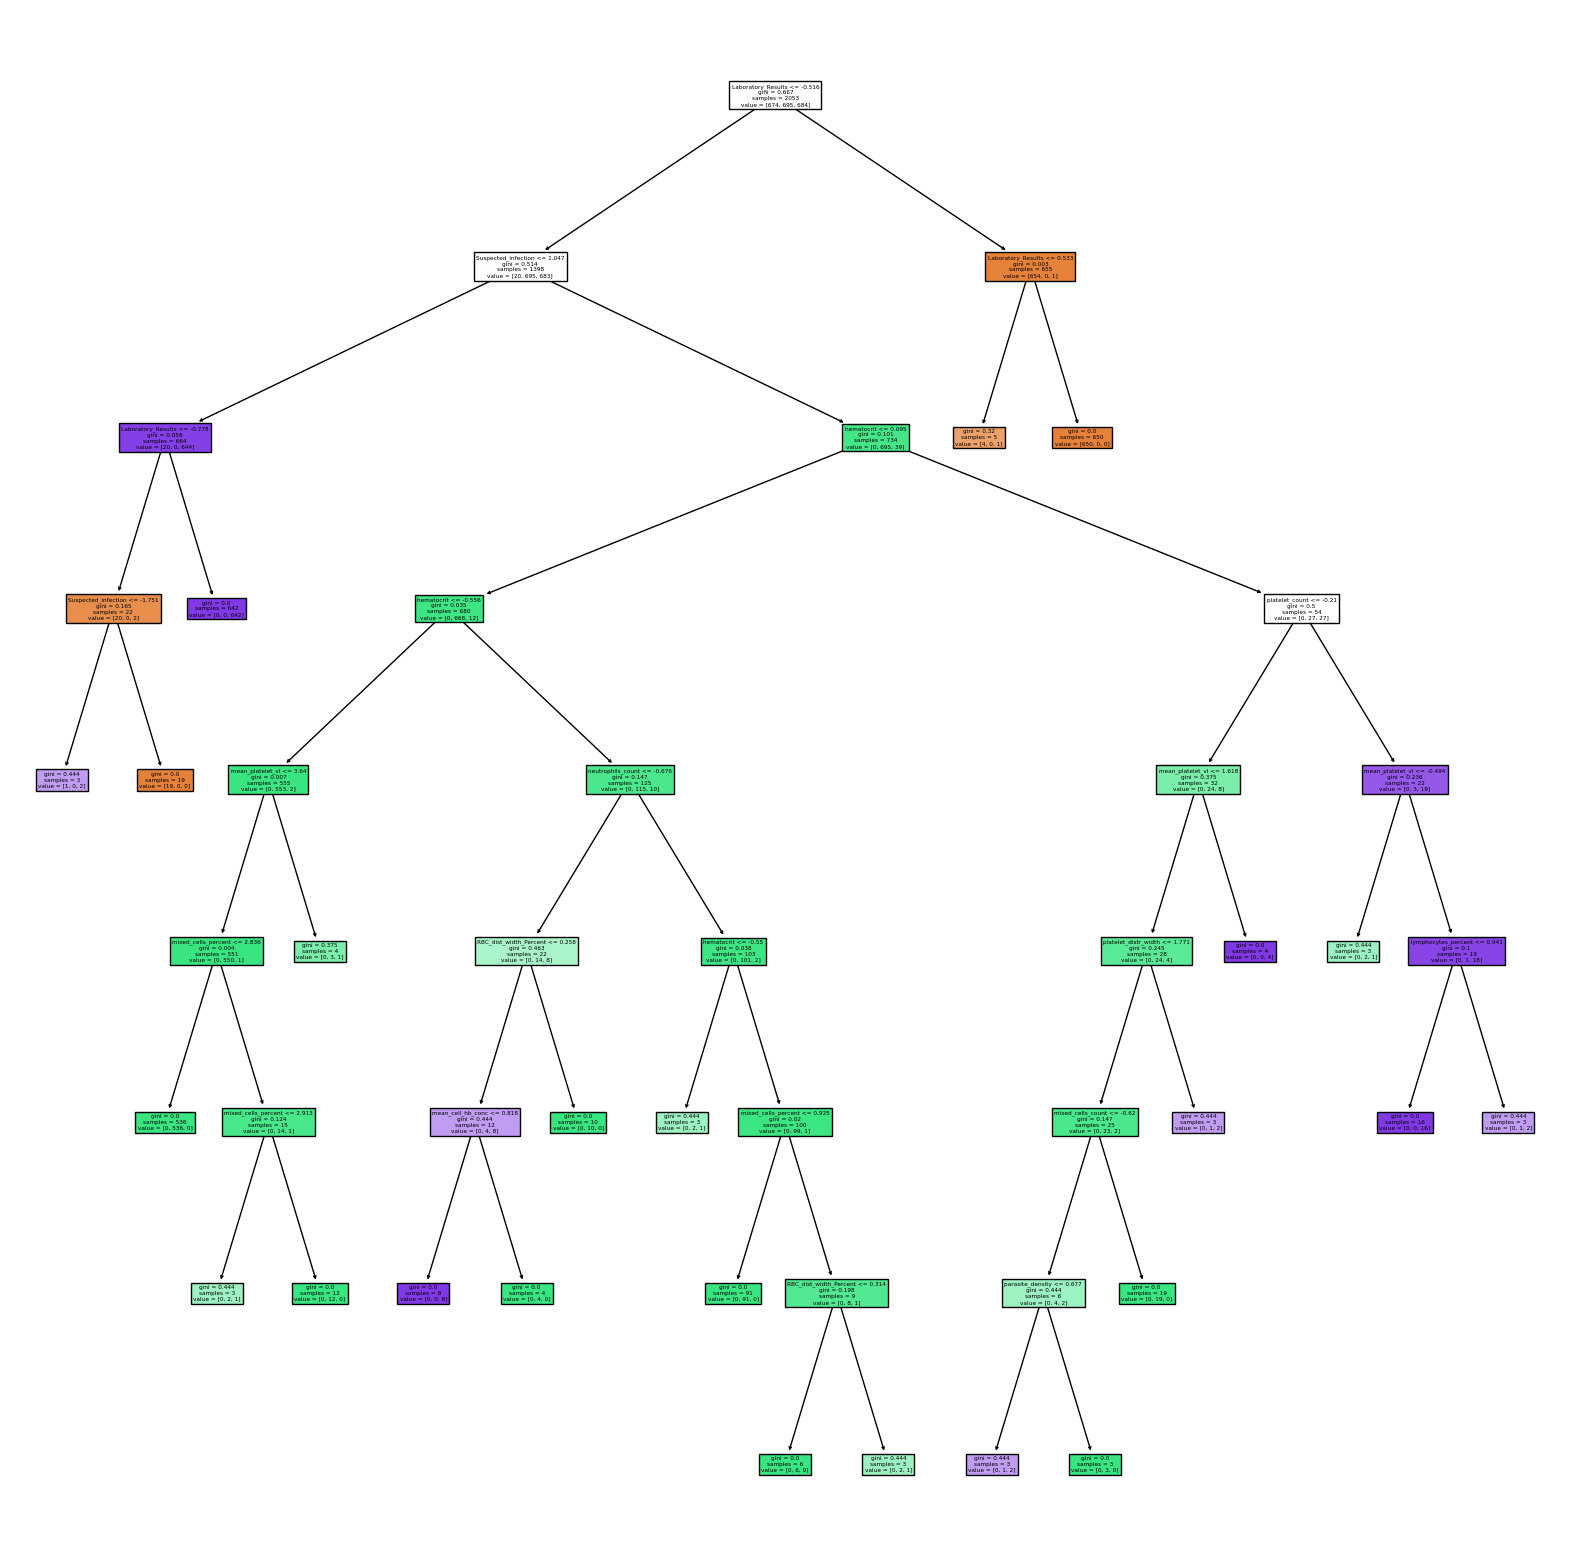

In [62]:
from sklearn import tree
feature=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc2,feature_names=feature,filled=True)

In [63]:
#entriopy and max depth
for i in range(1,9):
    dtc3=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print("max depth",i)
    dtc3=create_model(dtc3)


max depth 1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.49      1.00      0.65       283
           2       0.00      0.00      0.00       294

    accuracy                           0.66       881
   macro avg       0.50      0.66      0.55       881
weighted avg       0.50      0.66      0.55       881

[[298   6   0]
 [  0 283   0]
 [  0 294   0]]
max depth 2
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
max depth 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
 

In [64]:
for  i in range(1,45):
    dtc4=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print("min sample leaf",i)
    dtc4=create_model(dtc4)

min sample leaf 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.99      0.98       283
           2       0.99      0.97      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.98       881
weighted avg       0.99      0.99      0.99       881

[[304   0   0]
 [  0 280   3]
 [  0  10 284]]
min sample leaf 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.99      0.98       283
           2       0.99      0.97      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.98       881
weighted avg       0.99      0.99      0.99       881

[[304   0   0]
 [  0 280   3]
 [  0  10 284]]
min sample leaf 3
              precision    recall  f1-score   support

           0       1.00      1.00    

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
min sample leaf 31
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.92      1.00      0.96       283
           2       0.98      0.91      0.95       294

    accuracy                           0.96       881
   macro avg       0.97      0.97      0.96       881
weighted avg       0.97      0.96      0.96       881

[[298   0   6]
 [  0 283   0]
 [  0  25 269]]
min sample leaf 32
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
for i in range(1,20):
    rfc=RandomForestClassifier(random_state=1,n_estimators=i)
    print("random forest classifier",i)
    rfc=create_model(rfc)

random forest classifier 1
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       304
           1       0.94      0.92      0.93       283
           2       0.84      0.87      0.86       294

    accuracy                           0.90       881
   macro avg       0.90      0.90      0.90       881
weighted avg       0.90      0.90      0.90       881

[[280   0  24]
 [  0 259  24]
 [ 22  16 256]]
random forest classifier 2
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       304
           1       0.93      0.97      0.95       283
           2       0.96      0.85      0.90       294

    accuracy                           0.94       881
   macro avg       0.94      0.94      0.94       881
weighted avg       0.94      0.94      0.94       881

[[301   0   3]
 [  0 275   8]
 [ 24  21 249]]
random forest classifier 3
              precision    recall  f1-score   support

          

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       304
           1       0.98      0.99      0.98       283
           2       0.98      0.98      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[302   0   2]
 [  0 280   3]
 [  0   7 287]]


In [73]:
rfc=RandomForestClassifier(random_state=1,n_estimators=19)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       304
           1       0.98      0.99      0.98       283
           2       0.98      0.98      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[302   0   2]
 [  0 280   3]
 [  0   7 287]]


In [74]:
dict5={'Features':X.columns,"Information_Gain":rfc.feature_importances_}
df4=pd.DataFrame(dict5)
df4
#sorting values
df4=df4.sort_values(by='Information_Gain',ascending=False)
df4

,Features,Information_Gain
5,Laboratory_Results,0.261167
2,Suspected_infection,0.133102
3,RDT,0.098531
11,hematocrit,0.092676
10,hb_level,0.076438
4,Microscopy,0.071056
7,parasite_density,0.048003
14,mean_cell_hb_conc,0.041472
9,rbc_count,0.040217
17,mean_platelet_vl,0.023909


In [75]:
from sklearn.ensemble  import AdaBoostClassifier

In [77]:
# #hit and try method  for adaboost classifier
for i in range(1,17):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    #call function
    ada=create_model(ada)

No of estimators: 1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.49      1.00      0.65       283
           2       0.00      0.00      0.00       294

    accuracy                           0.66       881
   macro avg       0.50      0.66      0.55       881
weighted avg       0.50      0.66      0.55       881

[[298   6   0]
 [  0 283   0]
 [  0 294   0]]
No of estimators: 2
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       304
           1       0.49      1.00      0.66       283
           2       0.00      0.00      0.00       294

    accuracy                           0.33       881
   macro avg       0.50      0.34      0.23       881
weighted avg       0.50      0.33      0.22       881

[[  6   0 298]
 [  0 283   0]
 [  0 294   0]]
No of estimators: 3
              precision    recall  f1-score   support

           0       1.00      0.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
for i in range(1,101):
    gbc = GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of estimators:",i)
    gbc=create_model(gbc)

No of estimators: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.95      0.99      0.97       283
           2       0.99      0.95      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 279   4]
 [  0  14 280]]
No of estimators: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.95      0.99      0.97       283
           2       0.98      0.95      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[303   0   1]
 [  0 279   4]
 [  0  14 280]]
No of estimators: 3
              precision    recall  f1-score   support

           0       1.00      0.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       304
           1       0.96      1.00      0.98       283
           2       0.99      0.96      0.98       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[302   0   2]
 [  0 283   0]
 [  0  12 282]]
No of estimators: 21
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       304
           1       0.96      1.00      0.98       283
           2       0.99      0.96      0.98       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[302   0   2]
 [  0 283   0]
 [  0  12 282]]
No of estimators: 22
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      1.00      0.99       283
           2       1.00      0.97      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   8 286]]
No of estimators: 40
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      1.00      0.99       283
           2       1.00      0.97      0.98       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   8 286]]
No of estimators: 41
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       1.00      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   5 289]]
No of estimators: 59
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       1.00      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   5 289]]
No of estimators: 60
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       1.00      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   5 289]]
No of estimators: 78
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       1.00      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   5 289]]
No of estimators: 79
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.99      1.00      0.99       283
           2       1.00      0.99      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   4 290]]
No of estimators: 97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.99      1.00      0.99       283
           2       1.00      0.99      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   4 290]]
No of estimators: 98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

In [81]:
gbc = GradientBoostingClassifier(n_estimators=99,random_state=1)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.99      1.00      0.99       283
           2       1.00      0.99      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 283   0]
 [  0   4 290]]


In [82]:
dict={"Features":X.columns,"Informatin Gain":gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Features,Informatin Gain
0,fever_symptom,0.000207
1,Suspected_Organism,0.000111
2,Suspected_infection,0.410472
3,RDT,0.001187
4,Microscopy,0.002178
5,Laboratory_Results,0.526945
6,temperature,0.000415
7,parasite_density,0.004157
8,wbc_count,0.000275
9,rbc_count,0.000425


In [83]:
from xgboost import XGBClassifier

In [84]:
xgb=XGBClassifier()

In [85]:
for i in range(1,101):
    xgb=XGBClassifier(random_state=1,n_estimators=i)
    print("number",i)
    xgb=create_model(xgb)

number 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.96      0.99      0.97       283
           2       0.99      0.96      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 279   4]
 [  0  12 282]]
number 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.97      0.98      0.97       283
           2       0.98      0.97      0.97       294

    accuracy                           0.98       881
   macro avg       0.98      0.98      0.98       881
weighted avg       0.98      0.98      0.98       881

[[304   0   0]
 [  0 278   5]
 [  0  10 284]]
number 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
          

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   6 288]]
number 23
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   6 288]]
number 24
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 44
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 45
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 63
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 83
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.98      1.00      0.99       283
           2       0.99      0.98      0.99       294

    accuracy                           0.99       881
   macro avg       0.99      0.99      0.99       881
weighted avg       0.99      0.99      0.99       881

[[303   0   1]
 [  0 282   1]
 [  0   5 289]]
number 84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1     